# DSCI 619 Deep Learning
# Week 4: Build Convolutional Neural Network (CNN) Models



# Project of CIFAR-10 Image Classification Using PyTorch


Let’s look at a real-world project of image classification using TensorFlow. We will cover how to perform image classification using CNN. (see https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=image%20classification)
This CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html) containing 60,000 32x32 color images in 10 classes. It is a balanced classification with  6000 images for each class. The training dataset has 50,000 images, and the test data contains 10,000 images.

## Load and Clean the Data

First, we load the libraries for CNN

In [1]:
import torch
import torchvision
#import torchvision.transforms as transforms

Next, we need to load the built-in dataset. The output of torchvision datasets is PIL images of range [0,1]. Next, we normalize it by subtracting the mean and dividing by the standard deviation.
We compose these transforms together using compositions of transforms. (https://pytorch.org/docs/stable/torchvision/transforms.html)


In [2]:
MU= 0.5
SIGMA = 0.5
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((MU, MU, MU), (SIGMA, SIGMA, SIGMA))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4,
                                          shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False, num_workers=2)

class_label = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Next, let's check the sizes of the datasets

In [3]:
# get some random training images
data_iter = iter(train_loader)
# Get next batch of 4 images
images, labels = data_iter.next()
print(f' The images shape = {images.shape}, and the label encoding = {labels}')

 The images shape = torch.Size([4, 3, 32, 32]), and the label encoding = tensor([4, 3, 7, 8])


It is easy for us to see that:

+ The label is a one-dimensional tensor as we see before.
+ But the features are four-dimensional vectors, unlike the typical two-dimensional vector early.
  It has the format of **(N, C, H, W)** in TensorFlow
    + N: The first dimension denotes the number of images; for example, there are 4 images in a batch specified in the torch.utils.data.DataLoader.
    + C: A channel is the same size as a color image with only one of these primary colors. (see https://en.wikipedia.org/wiki/Channel_(digital_image)) For example, A grayscale image has just one channel. A color image typically has three channels, red, green, and blue. In general, we may think the channel holds some information about the image. It could be a larger number, such as 64. 
    + H: It specifies the width of an image in pixels. (see https://en.wikipedia.org/wiki/Pixel). For most images, pixel values range from 0 (black) to 255 (white). (see https://www.whydomath.org/node/wavlets/imagebasics.html)
    + W: It specifies the height of an image in pixels.
    

Keep in mind that the **features must be a 4 D vector of (N, C, H, W) in PyTorch**. If the images in a different format (N, H, W, C) can be converted to (N, C, H, W) using np.einsum or np.transpose. (see https://stackoverflow.com/questions/23943379/swapping-the-dimensions-of-a-numpy-array or https://stackoverflow.com/questions/37689423/convert-between-nhwc-and-nchw-in-tensorflow) 


## Visualize the Images

If we try to print out the 3D array, we have $3\times 32\times 32= 3072$ elements. The information is overwhelming.

In [4]:
images[0]

tensor([[[-0.3098, -0.3490, -0.3961,  ..., -0.2471, -0.3176, -0.3176],
         [-0.3176, -0.3490, -0.3961,  ..., -0.3412, -0.3412, -0.3725],
         [-0.3333, -0.3412, -0.3647,  ..., -0.3647, -0.3725, -0.3804],
         ...,
         [-0.1843, -0.2000, -0.2706,  ..., -0.2000, -0.2078, -0.1922],
         [-0.2314, -0.2000, -0.2157,  ..., -0.1686, -0.2000, -0.1922],
         [-0.2863, -0.2392, -0.2157,  ..., -0.1765, -0.2000, -0.1922]],

        [[-0.0196, -0.0510, -0.0588,  ..., -0.0275, -0.0588, -0.0431],
         [ 0.0196, -0.0039, -0.0196,  ..., -0.0118,  0.0275,  0.0039],
         [ 0.0196,  0.0118,  0.0353,  ..., -0.0039,  0.0431,  0.0275],
         ...,
         [ 0.2000,  0.1765,  0.1059,  ...,  0.1686,  0.1137,  0.1294],
         [ 0.1765,  0.1922,  0.1843,  ...,  0.1843,  0.1216,  0.1373],
         [ 0.1451,  0.1765,  0.1922,  ...,  0.1843,  0.1216,  0.1608]],

        [[-0.4118, -0.4275, -0.4510,  ..., -0.3412, -0.4039, -0.3804],
         [-0.4353, -0.4353, -0.4667,  ..., -0

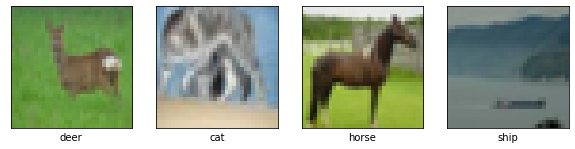

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random


# Fix the seed to reproduce the results
SEED = 1001
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # new flag present in tf 2.0+
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)


plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    # Unnormalize it
    img = images[i]
    img = img *SIGMA + MU    
    npimg = img.numpy()
    # Display the image, imshow only support(H, W, C)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # Label it by mapping the class id to class labels
    plt.xlabel(class_label[labels[i]])
plt.show()

## Create a Simple CNN Model

When we do image classification, unlike typical class classification such as loan application based on  numerical features such as income and employment, etc., the image classification is very challenging in the following ways:

+ The feature is not 1 D Tensor. It is a 3-dimensional matrix such as 32*32*3 with 3072 elements.
+ There could be a dog in the image. But the dog's location could be anywhere, such as in the top left corner, center, bottom right corner, etc., our algorithm should handle the translation invariance.

Let's see how human eyes and brain can detect the Maryville Logo (**M**) in the following image: 

<img src = "MU.jpg">

When we search it, our eyes and brain only focus on a small region, for example, the size of $3\times 3$ window, then we scan it from left to the right and top to bottom using the small rolling window to cover the whole image. Our eyes may detect three **M** in this image. The key idea here is to focus on a small region/window and check this rolling window with the shape of **M** in our brain. The Convolution Neural Networks (CNN) apply the same idea to detect the **M**.

+ It uses a convolution filter (or kernel window, or convolution window) that is typically very small such as $2\times 2, 3\times 3$, etc.
+ It performs the convolution operator(see: https://en.wikipedia.org/wiki/Convolution) to check the similarity.
Roughly speaking, it is the cross-correlation operation that is similar to the Pearson correlation coefficient(see: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

For example, for a given $6 \times 6$ image and a filter window size of $3 \times 3$, The following graph summarizes the convolution operation:

<img src = "CNN.png">

Source: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

This filter performs elementwise multiplication for corresponding pixes in the sliding windows and the filter windows. It maps $3\times 3$ matrix to a scalar.  We can estimate the filter's weights from the data. This figure can help us detect edges in images.

The dynamic graphs above move 1-pixel horizontally and vertically. It is called the stride =1. When we roll the filter window from left to right or top to bottom, we may move more than 1 pixel, such as 2 pixels. It is called the **strides** of the convolution along with the height and width.

By the graph above, we can see that it lose pixels after convolution is applied. We can add pixel values of zeros around the input image. 

Padding is very important in CNN. It is summarized in the following:

1. It's easier to design networks if we preserve the height and width and don't have to worry too much about tensor dimensions when going from one layer to another because dimensions will just "work".

2. It allows us to design deeper networks. Without padding, a reduction in volume size would reduce too quickly.

3. Padding improves performance by keeping information at the borders. 

Source: https://stats.stackexchange.com/questions/246512/convolutional-layers-to-pad-or-not-to-pad


After we apply the convolution layer, we typically apply a pooling layer (see https://d2l.ai/chapter_convolutional-neural-networks/pooling.html)  using a small pooling window as $ 2 \times 2$. It helps reduce the dimensionality of the output. There are two popular pooling methods:
+ Maximum pooling takes the maximum pixel in the pooling window. It is the most commonly used method in CNN.
+ Average pooling takes the average of pixels in the pooling.

We can apply many layers of convolution and pooling to summarize the image. Finally, We typically get a 4-dimensional matrix of $N\times C\times H \times W$. 

We will use two functions of **torch.nn.Conv2d** (https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)  and **torch.nn.MaxPool2d** (https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) to perform image classification.

Let's create our first CNN model using PyTorch
+ First convolution with in_channels =3 that is the channels of the input image. We specify the out_channels = 32 and kernel_size = 3; which means the same value of 3  is used for the height and width dimension.
+ Max Pooling layer with a kernel size of $2 \times 2$ 
+ Second Convolution layer with in_channels =32 that is the out_channels of the first convolution layer.  We specify the out_channels = 64 and kernel_size = 3; which means the same value of 3  is used for the height and width dimension.

### Add Classifier at the End
The target has ten cases. It is a classification problem. We have learned how to perform classification using neuron networks on a 2-dimensional features matrix of $ N\times C$. But the inputs (the output of the last layer above is a 4D matrix). Therefore we need to convert the 4D matrix to a 2D matrix. We need to flatten the input from a 4D to a 2D matrix manually using **nn.Linear** method. (see: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) 

+ The first Linear method with in_features = $64 \times 6 \times 6$ that must be calculated carefully using some mathematical formula. (see https://arxiv.org/abs/1603.07285). But We have a shortcut to get the size of the in_features by **printing it out immediately before the first nn.Linear method**. We will show you in a few cells. We choose the out_features = 128.
+ The second Linear method with in_features =128 that is the out_features of the previous Linear layer. We specify the out_features =64.
+ The **last layer** (third Linear method) with in_features =64 is the out_features of the previous Linear layer. Since there are ten unique cases in the label, the last layer must use ten neurons. We specify the out_features = 10. 



In [6]:
import torch.nn as nn
import torch.nn.functional as F


class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        # the in_feautures o 64 * 6 * 6 to be determined later
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(f' x= {x.shape}')
        #sys.exit()
        # the volum number of 64 * 6 * 6 to be determine later
        # -1 means the the actual value for the first dimension will be inferred
        # so that the number of elements in the view matches the original number of elements.
        x = x.view(-1, 64 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
CNNNet = CNNNet()

## Configure the Model

We specify the optimizer as SGD (see https://pytorch.org/docs/stable/optim.html?highlight=optim%20sgd#torch.optim.SGD) with learning rate and momentum. It is a multiclass classification problems. The loss function should be **nn.CrossEntropyLoss()** (see https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). 

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNNNet.parameters(), lr=0.001, momentum=0.9)

## Train the CNN Model

We need to write a nested loop to train the CNN model. The outer loop takes care of the epochs. The inner loop takes care of the iterations based on the batch size. There are 50,000 images in the training dataset, and the batch size = 4. Therefore, the iteration= $\frac{50,000}{4}=12,500$. We also need to compute the loss for each epoch by aggregating the loss of all 12,500 iterations. 

In [8]:
%%time
import sys
report_batchs = 1000
EPOCHS = 2
# Pass the whole dataset multiple times to CNN Model
for epoch in range(EPOCHS):  

    running_loss = 0.0
    # take out a batch if size 4 from the training data
    for i, data in enumerate(train_loader, 0):
        # Get the inputs/features and labels
        inputs, labels = data

        # Reset gradients = 0
        optimizer.zero_grad()

        # Forward progagation to compute the outputs
        outputs = CNNNet(inputs)
        loss = criterion(outputs, labels)
        # Backward propagation and compute the gradient
        loss.backward()
        # Update the weights 
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % report_batchs == report_batchs -1:
            print(f'[Epoch: {epoch + 1}, batch: [{i+1-report_batchs} to {i+1}]] loss ={running_loss / report_batchs:.2f}')
            running_loss = 0.0
print('Complet Training of {EPOCHS} epochs!')

[Epoch: 1, batch: [0 to 1000]] loss =2.24
[Epoch: 1, batch: [1000 to 2000]] loss =2.01
[Epoch: 1, batch: [2000 to 3000]] loss =1.82
[Epoch: 1, batch: [3000 to 4000]] loss =1.68
[Epoch: 1, batch: [4000 to 5000]] loss =1.60
[Epoch: 1, batch: [5000 to 6000]] loss =1.51
[Epoch: 1, batch: [6000 to 7000]] loss =1.44
[Epoch: 1, batch: [7000 to 8000]] loss =1.40
[Epoch: 1, batch: [8000 to 9000]] loss =1.40
[Epoch: 1, batch: [9000 to 10000]] loss =1.31
[Epoch: 1, batch: [10000 to 11000]] loss =1.28
[Epoch: 1, batch: [11000 to 12000]] loss =1.29
[Epoch: 2, batch: [0 to 1000]] loss =1.19
[Epoch: 2, batch: [1000 to 2000]] loss =1.19
[Epoch: 2, batch: [2000 to 3000]] loss =1.16
[Epoch: 2, batch: [3000 to 4000]] loss =1.14
[Epoch: 2, batch: [4000 to 5000]] loss =1.09
[Epoch: 2, batch: [5000 to 6000]] loss =1.09
[Epoch: 2, batch: [6000 to 7000]] loss =1.08
[Epoch: 2, batch: [7000 to 8000]] loss =1.07
[Epoch: 2, batch: [8000 to 9000]] loss =1.10
[Epoch: 2, batch: [9000 to 10000]] loss =1.07
[Epoch: 2,

### Determine the Shape of the First Linear Layer

We can easily print out the shape of the first linear layer by inserting a print command immediately before it.

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN Model
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        # the in_feautures  to be determined; we just use a place holder such as 10*10*10
        self.fc1 = nn.Linear(10 * 10 * 10, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # We just ADD the print command to print out the shape immediately BEFORE we flatten it using view
        print(f' x= {x.shape}')
        # Don't forget exit since we only need to print it once
        sys.exit()
        # the volum number of to be determine, we just use a place holder of 10*10*10
        # -1 means the the actual value for the first dimension will be inferred
        # so that the number of elements in the view matches the original number of elements.
        x = x.view(-1, 10 * 10 * 10)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
CNNNet = CNNNet()

# Configure the CNN
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNNNet.parameters(), lr=0.001, momentum=0.9)

# Train the model

import sys
report_batchs = 1000
EPOCHS = 2
# Pass the whole dataset multiple times to CNN Model
for epoch in range(EPOCHS):  

    running_loss = 0.0
    # take out a batch if size 4 from the training data
    for i, data in enumerate(train_loader, 0):
        # Get the inputs/features and labels
        inputs, labels = data

        # Reset gradients = 0
        optimizer.zero_grad()

        # Forward progagation to compute the outputs
        outputs = CNNNet(inputs)
        loss = criterion(outputs, labels)
        # Backward propagation and compute the gradient
        loss.backward()
        # Update the weights 
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % report_batchs == report_batchs -1:
            print(f'[Epoch: {epoch + 1}, batch: [{i+1-report_batchs} to {i+1}]] loss ={running_loss / report_batchs:.2f}')
            running_loss = 0.0
print('Complet Training of {EPOCHS} epochs!')

 x= torch.Size([4, 64, 6, 6])


SystemExit: 

C:\Users\liuyu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


By looking at the output above, we can easily see that the shape of the input is the size of [4, 64, 6, 6] in **[N, C, H, W]**. Where
+ N = 4; There are four images since the batch size is 4
+ C = 64, We specified 64 channels in the last Conv2D
+ H = 6 pixels
+ W = 6 pixels

Therefore, we need to convert the 4 D to 2D by converting [C, H, W] to a column vector with a size of = $C \times H \times W$
i.e. 

+ In the first nn.Linear method, the in_feautures = $64 \times  6 \times 6$
+ The second parameter in the x = x.view(-1, ) should be $64 \times  6 \times 6$

## Evaluate the Model on the Test Dataset

We want to evaluate the CNN model by forecast the test dataset and check the accuracy on one batch of size 4. 

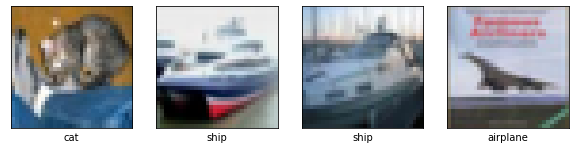

In [9]:
# take out one batch of size of 4 from test dataset
dataiter = iter(test_loader)
images, labels = dataiter.next()
outputs = CNNNet(images)
# Take out the index of the emaximum value 
_, predicted_labels = torch.max(outputs, 1)

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    # Unnormalize it
    img = images[i]
    img = img *SIGMA + MU    
    npimg = img.numpy()
    # Display the image, imshow only support(H, W, C)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # Label it by mapping the class id to class labels
    plt.xlabel(class_label[predicted_labels[i]])
plt.show()

Finally let's summarize the classification report for the test dataset. There are ten cases in the label. We will compute the accuracy for each class. When we evaluate the model, we don't need to update the weights. Therefore, we don't need to use gradient by specifying torch.no_grad.

In [10]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
# No need to estimate gradient
with torch.no_grad():
    # loop over the test dataset by taking out a batch of size 4 each time
    for data in test_loader:
        # Seperate the features and labels
        images, labels = data
        # Forecast the labels for a batch of size 4
        outputs = CNNNet(images)
        # Get the index of the maximum value , which is the predicted class index
        _, predicted = torch.max(outputs, 1)
        # Check wehter the predicted labels matche the actual label index
        c = (predicted == labels).squeeze()
        # Handle one batch of size 4 images
        for i in range(4):
            label = labels[i]
            # Update the counters of corrected classes and total classes
            class_correct[label] += c[i].item()
            class_total[label] += 1
#print it out
for i in range(10):
    print(f'Accuracy of {class_label[i]} = {100 * class_correct[i] / class_total[i]:.2f}')

Accuracy of airplane = 73.40
Accuracy of automobile = 80.90
Accuracy of bird = 51.70
Accuracy of cat = 54.50
Accuracy of deer = 47.40
Accuracy of dog = 52.40
Accuracy of frog = 77.70
Accuracy of horse = 78.30
Accuracy of ship = 71.40
Accuracy of truck = 74.10


# Create the Image Classification Model Using Transfer Learning from a Pre-trained Network

Instead of training the model from scratch, we can take advantage of the pre-trained neuron network on a large dataset. It is very time-consuming to train it. We don't need to reinvent the wheel. We can stand on the shoulders of the giants. 

PyTorch includes the following pre-trained neuron networks. (see https://pytorch.org/vision/0.8/models.html)

+ AlexNet
+ VGG
+ ResNet
+ SqueezeNet
+ DenseNet
+ Inception v3
+ GoogLeNet
+ ShuffleNet v2
+ MobileNet v2
+ ResNeXt
+ Wide ResNet
+ MNASNet

We typically need to **override the last layer/top (fully-connected layer)** of the neuron network and **add our classifier in the end**.

For illustration purpose, we use the **torchvision.models.resnet34** (see https://arxiv.org/abs/1512.03385). We use the pre-trained modeld by specifying  **pretrained=True**


In [11]:
model_resnet34 = torchvision.models.resnet34(pretrained=True)
for param in model_resnet34.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_resnet34.fc.in_features
model_resnet34.fc = nn.Linear(num_ftrs, 10)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer = optim.SGD(model_resnet34.fc.parameters(), lr=0.001, momentum=0.9)



In [12]:
%%time
import sys
report_batchs = 1000
EPOCHS = 2
# Pass the whole dataset multiple times to CNN Model
for epoch in range(EPOCHS):  

    running_loss = 0.0
    # take out a batch if size 4 from the training data
    for i, data in enumerate(train_loader, 0):
        # Get the inputs/features and labels
        inputs, labels = data

        # Reset gradients = 0
        optimizer.zero_grad()

        # Forward progagation to compute the outputs
        outputs = model_resnet34(inputs)
        loss = criterion(outputs, labels)
        # Backward propagation and compute the gradient
        loss.backward()
        # Update the weights 
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % report_batchs == report_batchs -1:
            print(f'[Epoch: {epoch + 1}, batch: [{i+1-report_batchs} to {i+1}]] loss ={running_loss / report_batchs:.2f}')
            running_loss = 0.0
print('Complet Training of {EPOCHS} epochs!')

[Epoch: 1, batch: [0 to 1000]] loss =2.56
[Epoch: 1, batch: [1000 to 2000]] loss =2.58
[Epoch: 1, batch: [2000 to 3000]] loss =2.55
[Epoch: 1, batch: [3000 to 4000]] loss =2.59
[Epoch: 1, batch: [4000 to 5000]] loss =2.57
[Epoch: 1, batch: [5000 to 6000]] loss =2.63
[Epoch: 1, batch: [6000 to 7000]] loss =2.60
[Epoch: 1, batch: [7000 to 8000]] loss =2.53
[Epoch: 1, batch: [8000 to 9000]] loss =2.56
[Epoch: 1, batch: [9000 to 10000]] loss =2.57
[Epoch: 1, batch: [10000 to 11000]] loss =2.56
[Epoch: 1, batch: [11000 to 12000]] loss =2.65
[Epoch: 2, batch: [0 to 1000]] loss =2.55
[Epoch: 2, batch: [1000 to 2000]] loss =2.59
[Epoch: 2, batch: [2000 to 3000]] loss =2.66
[Epoch: 2, batch: [3000 to 4000]] loss =2.63
[Epoch: 2, batch: [4000 to 5000]] loss =2.57
[Epoch: 2, batch: [5000 to 6000]] loss =2.62
[Epoch: 2, batch: [6000 to 7000]] loss =2.50
[Epoch: 2, batch: [7000 to 8000]] loss =2.64
[Epoch: 2, batch: [8000 to 9000]] loss =2.64
[Epoch: 2, batch: [9000 to 10000]] loss =2.60
[Epoch: 2,

## Evaluate the Model on the Test Dataset

We want to evaluate the CNN model by forecast the test dataset and check the accuracy on one batch of size 4. 

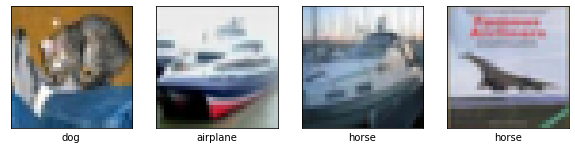

In [13]:
# take out one batch of size of 4 from test dataset
dataiter = iter(test_loader)
images, labels = dataiter.next()
outputs = model_resnet34(images)
# Take out the index of the emaximum value 
_, predicted_labels = torch.max(outputs, 1)

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    # Unnormalize it
    img = images[i]
    img = img *SIGMA + MU    
    npimg = img.numpy()
    # Display the image, imshow only support(H, W, C)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # Label it by mapping the class id to class labels
    plt.xlabel(class_label[predicted_labels[i]])
plt.show()

In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
# No need to estimate gradient
with torch.no_grad():
    # loop over the test dataset by taking out a batch of size 4 each time
    for data in test_loader:
        # Seperate the features and labels
        images, labels = data
        # Forecast the labels for a batch of size 4
        outputs = model_resnet34(images)
        # Get the index of the maximum value , which is the predicted class index
        _, predicted = torch.max(outputs, 1)
        # Check wehter the predicted labels matche the actual label index
        c = (predicted == labels).squeeze()
        # Handle one batch of size 4 images
        for i in range(4):
            label = labels[i]
            # Update the counters of corrected classes and total classes
            class_correct[label] += c[i].item()
            class_total[label] += 1
#print it out
for i in range(10):
    print(f'Accuracy of {class_label[i]} = {100 * class_correct[i] / class_total[i]:.2f}')

Accuracy of airplane = 57.60
Accuracy of automobile = 46.20
Accuracy of bird = 12.80
Accuracy of cat = 13.70
Accuracy of deer = 24.80
Accuracy of dog = 23.80
Accuracy of frog = 17.60
Accuracy of horse = 38.60
Accuracy of ship = 8.60
Accuracy of truck = 30.00


# Summary

+ We can use convolution layers to extract features.
+ We apply pooling layers to reduce the dimensionality.
+ We need to visualize the images instead of numerically summarize it.
+ We perform image classification using CNN.
+ We load and preprocess images from local storage.
+ We Configure the dataset for Better performance.
+ We perform the image data augmentation techniques to train our models.
+ We know how to fix the pre-trained model weights in transfer learning.
+ We need to add a classifier in transfer learning.
+ We learn how to train the model based on transfer learning.
+ We can evaluate the image classification model. 
